# Question 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Part 1

In [144]:
## Load the wages csv

df = pd.read_csv('./data/wages_hw.csv')
print(df.dtypes) 

Unnamed: 0      int64
Rating        float64
Size           object
Sector         object
avg_salary    float64
job_state      object
dtype: object


In [145]:
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables; `object` is a bad sign
print(df.columns[1:5], '\n') # First five column names

(731, 6) 

Unnamed: 0      int64
Rating        float64
Size           object
Sector         object
avg_salary    float64
job_state      object
dtype: object 

Index(['Rating', 'Size', 'Sector', 'avg_salary'], dtype='object') 



In [146]:
df.head()

,Unnamed: 0,Rating,Size,Sector,avg_salary,job_state
0,1,3.8,501 to 1000 employees,Aerospace & Defense,72.0,NM
1,2,3.4,10000+ employees,Health Care,87.5,MD
2,3,4.8,501 to 1000 employees,Business Services,85.0,FL
3,4,3.8,1001 to 5000 employees,"Oil, Gas, Energy & Utilities",76.5,WA
4,5,2.9,51 to 200 employees,Business Services,114.5,NY


In [147]:
df.tail()

,Unnamed: 0,Rating,Size,Sector,avg_salary,job_state
726,738,3.9,10000+ employees,Biotech & Pharmaceuticals,84.5,MA
727,739,4.4,1001 to 5000 employees,Information Technology,102.5,TN
728,740,2.6,501 to 1000 employees,Education,73.5,PA
729,741,3.2,1 to 50 employees,Business Services,127.5,PA
730,742,3.6,501 to 1000 employees,Government,93.5,OH


In [148]:
cdf = df.copy()

In [149]:
## Cleaning the data, outliers, missings

<AxesSubplot:>

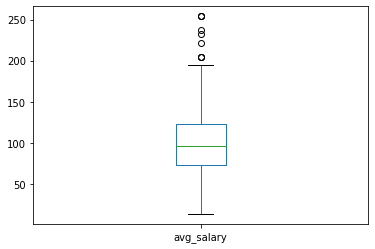

In [150]:
cdf['avg_salary'].plot.box() # outliers above 200 

<AxesSubplot:>

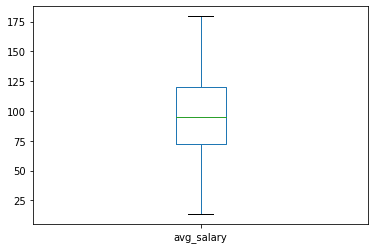

In [151]:
cdf = cdf.loc[cdf['avg_salary']<180,:]
cdf['avg_salary'].plot.box()

<AxesSubplot:>

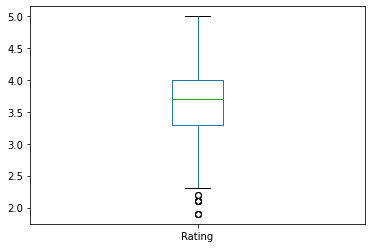

In [152]:
df['Rating'].plot.box()

<AxesSubplot:>

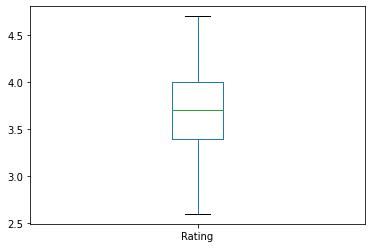

In [153]:
cdf = cdf.loc[cdf['Rating']>2.5,:]
cdf = cdf.loc[cdf['Rating']<4.75,:]
cdf['Rating'].plot.box()

In [154]:
columns = ['Unnamed: 0','Rating','Size','Sector','avg_salary','job_state']

for thing in columns: 
    is_na = cdf[thing].isna()
    
    # Print the result
    for i in is_na: 
        if i == True: 
            print(is_na)
        else: 
            continue
    print(thing, 'Done')

## There seem to be no NAns in the dataset

Unnamed: 0 Done
Rating Done
Size Done
Sector Done
avg_salary Done
job_state Done


<AxesSubplot:xlabel='Sector', ylabel='avg_salary'>

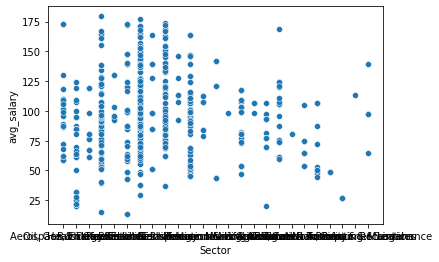

In [155]:
sns.scatterplot(data=cdf,y='avg_salary',x='Sector')

In [156]:
## Cleaning the data, outliers, missings

In [157]:
## Split the data into a training and testing data

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming maxmin is MinMaxScaler
scaler = MinMaxScaler()

# Extracting numeric columns for normalization
X = cdf.iloc[:,[1, 4]] 
# this is already indexing into cdf to get the numeric variables, so we don't have to indicate that below

# Normalize numeric columns in X
X_normalized = scaler.fit_transform(X)

# Assuming you have a target variable named 'y'
y = cdf['avg_salary']  

# Split the sample
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=100)

# part of this code came from chat gpt to help me split the data

print(X_train.shape)
print(X_test.shape)

(540, 2)
(136, 2)


In [158]:
cdf.head()

,Unnamed: 0,Rating,Size,Sector,avg_salary,job_state
0,1,3.8,501 to 1000 employees,Aerospace & Defense,72.0,NM
1,2,3.4,10000+ employees,Health Care,87.5,MD
3,4,3.8,1001 to 5000 employees,"Oil, Gas, Energy & Utilities",76.5,WA
4,5,2.9,51 to 200 employees,Business Services,114.5,NY
5,6,3.4,201 to 500 employees,Real Estate,95.0,TX


In [159]:
# making one hot encoded variables for the categorical

from sklearn.preprocessing import LabelBinarizer
one_hot_encoder = LabelBinarizer()

# With sklearn processing OH for 'Size':

soh = one_hot_encoder.fit_transform(cdf['Size']) # One-hot encode the 'Make' variable
print(soh)
names = one_hot_encoder.classes_ # Get names of the classes
print(names)

sdf = pd.DataFrame( data = soh, columns = names) # Create a new df for the encoded variables
sdf.shape

# With sklearn processing OH for 'Size':

ssoh = one_hot_encoder.fit_transform(cdf['Sector']) # One-hot encode the 'Make' variable
print(ssoh)
names = one_hot_encoder.classes_ # Get names of the classes
print(names)

ssdf = pd.DataFrame( data = ssoh, columns = names) # Create a new df for the encoded variables
ssdf.shape

# With sklearn processing OH for 'Size':

joh = one_hot_encoder.fit_transform(cdf['job_state']) # One-hot encode the 'Make' variable
print(joh)
names = one_hot_encoder.classes_ # Get names of the classes
print(names)

jdf = pd.DataFrame( data = joh, columns = names) # Create a new df for the encoded variables
jdf.shape


[[0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
['1 to 50 employees' '10000+ employees' '1001 to 5000 employees'
 '201 to 500 employees' '5001 to 10000 employees' '501 to 1000 employees'
 '51 to 200 employees']
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['-1' 'Accounting & Legal' 'Aerospace & Defense' 'Agriculture & Forestry'
 'Arts, Entertainment & Recreation' 'Biotech & Pharmaceuticals'
 'Business Services' 'Construction, Repair & Maintenance'
 'Consumer Services' 'Education' 'Finance' 'Government' 'Health Care'
 'Information Technology' 'Insurance' 'Manufacturing' 'Media'
 'Mining & Metals' 'Non-Profit' 'Oil, Gas, Energy & Utilities'
 'Real Estate' 'Retail' 'Telecommunications' 'Transportation & Logistics'
 'Travel & Tourism']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ...

(676, 38)

In [160]:
xdf = pd.concat([sdf,ssdf,jdf],axis=1)



In [161]:
# Assuming you have a target variable named 'y'
X = xdf
y = cdf['avg_salary']  

# Split the sample
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=100)

In [162]:
X_trai = np.concatenate([X_train,X_train1],axis=1)
X_tes = np.concatenate([X_test,X_test1],axis=1)
# y_trai = pd.concat([y_train,y_train1],axis=1)
# y_tes = pd.concat([y_test,y_test1],axis=1)

In [163]:
print(X_trai.shape)
print(X_tes.shape)
print(y_train.shape)
y_test.shape

# y_trai.head()

(540, 72)
(136, 72)
(540,)


(136,)

## Part 2

In [164]:
def pn(x):
    print(x,'\n')

In [165]:
# Use a linear model to regress avg_salary on Sector. Which sectors have the highest predicted wages? 
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error

thing = 'Below is my Multiple Linear Regression Model for avg_salary based only on Sector:'
pn(thing)


reg = LinearRegression().fit(X_trai, y_train) # Fit the linear model
pn(f'this is the intercept value: {reg.intercept_}') # Intercept value
pn(f'these are the regression coefficients: {reg.coef_}') # Regression coefficients
pn(f'R Squared is equal to: {reg.score(X_trai, y_train)}') # R squared measure

# Predict values for the test set
y_pred = reg.predict(X_tes)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print(f'the root mean squared error is: {rmse}')


Below is my Multiple Linear Regression Model for avg_salary based only on Sector: 

this is the intercept value: 15.030232995723566 

these are the regression coefficients: [-2.61175089e-14  1.66000000e+02 -1.12954901e+00 -1.12954901e+00
 -1.12954901e+00 -1.12954901e+00 -1.12954901e+00 -1.12954901e+00
 -1.12954901e+00 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01
 -1.30488936e-01 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01
 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01
 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01
 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01
 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01
 -3.31628606e-01 -3.31628606e-01 -6.90553761e-02 -6.90553761e-02
 -6.90553761e-02 -6.90553761e-02 -6.90553761e-02 -6.90553761e-02
 -6.90553761e-02 -6.90553761e-02 -6.90553761e-02 -6.90553761e-02
 -6.90553761e-02 -6.90553761e-02 -6.90553761e-02 -6.90553761e-02
 -6.90553761e-02 -6.90553761e-02 -6.90553761e-0

<AxesSubplot:xlabel='Sector', ylabel='avg_salary'>

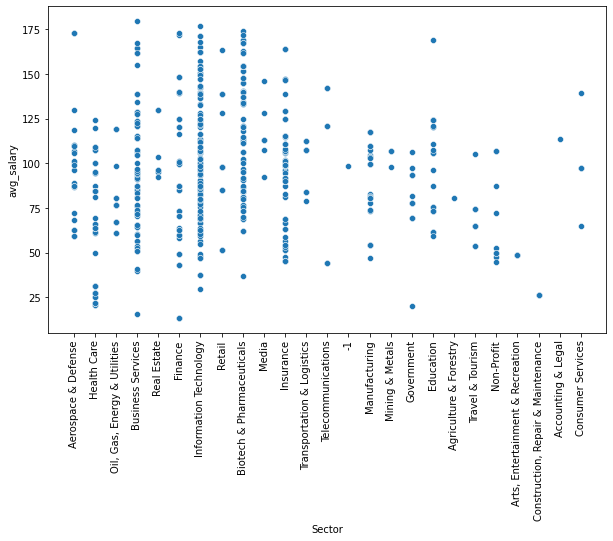

In [166]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)

sns.scatterplot(data=cdf,y='avg_salary',x='Sector')

In [167]:
# Which sectors have the highest predicted wages?

# It seems as though Information Technology, and biotech and pharmaceuticals have the highest predicted wages. 

In [168]:
# What is the  𝑅2  and RMSE on the test set?

# R Squared is equal to: 1.0 
# the root mean squared error is: 0.017247584443403866

## Part 3

<AxesSubplot:xlabel='Rating', ylabel='avg_salary'>

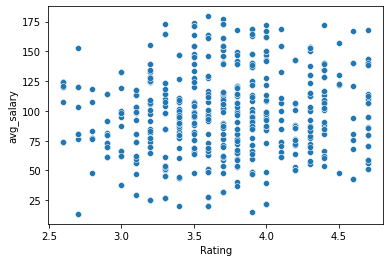

In [169]:
# Make a scatterplot of avg_salary and Rating. Is there an obvious visual relationship between the two variables?

sns.scatterplot(data=cdf,y='avg_salary',x='Rating')

# There does not seem to be an obvious visual relationship between the two variables. You might be able to say that
# an increasing rating increases with average salary, but it's unclear. 

In [170]:
cdf.head()
cdf.shape

(676, 6)

In [171]:
#  Regress avg_salary on Rating as a numeric variable: Do higher ratings predict higher or lower wages?

from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error

thing = 'Below is my Multiple Linear Regression Model for avg_salary based only on Rating:'
pn(thing)

# Assuming maxmin is MinMaxScaler
scaler = MinMaxScaler()

# Extracting numeric columns for normalization
X = cdf.iloc[:,[1]] 
# this is already indexing into cdf to get the numeric variables, so we don't have to indicate that below

# Normalize numeric columns in X
X_normalized = scaler.fit_transform(X)

# Assuming you have a target variable named 'y'
y = cdf['avg_salary']  

# Split the sample
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=100)

# part of this code came from chat gpt to help me split the data

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
pn(f'this is the intercept value: {reg.intercept_}') # Intercept value
pn(f'these are the regression coefficients: {reg.coef_}') # Regression coefficients
pn(f'R Squared is equal to: {reg.score(X_train, y_train)}') # R squared measure

# Predict values for the test set
y_pred = reg.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print(f'the root mean squared error is: {rmse}')


# There is basically no correlation between higher wages predicting higher ratings of the job given that the
# R^2 is equal to .01: an extremely low R^2. This basically indicates that a linear relationship is not the best way
# to model predictions in this data. 

Below is my Multiple Linear Regression Model for avg_salary based only on Rating: 

this is the intercept value: 87.3049661267769 

these are the regression coefficients: [19.21573713] 

R Squared is equal to: 0.01816038362736916 

the root mean squared error is: 36.73837534484608


In [172]:
## turning the ratings into categories

Ratings = ['poor','fair','good','great','fabulous']
# 3.0 less is poor
# 3.0 - 3.5 is fair
# 3.5 - 4.0 is good
# 4.0 - 4.5 is great
# 4.5 - 5.0 is fabulous

cdf = cdf.loc[cdf['Rating']>2.5,:]
cdf = cdf.loc[cdf['Rating']<4.75,:]

attribute_list = []

for value in cdf['Rating']:
    if value < 3.0:
        attribute_list.append('poor')
    elif 3.0 <= value < 3.5:
        attribute_list.append('fair')
    elif 3.5 <= value < 4.0:
        attribute_list.append('good')
    elif 4.0 <= value < 4.5:
        attribute_list.append('great')
    else:
        attribute_list.append('fabulous')
        
cdf['Rating_Category'] = attribute_list

# cdf['Rating'].plot.box()

In [173]:
# Convert Rating to a one-hot encoded variable, with a category for each rating.

# With sklearn processing OH for 'Size':

roh = one_hot_encoder.fit_transform(cdf['Rating_Category']) # One-hot encode the 'Make' variable
print(roh)
names = one_hot_encoder.classes_ # Get names of the classes
print(names)

rdf = pd.DataFrame( data = roh, columns = names) # Create a new df for the encoded variables
rdf.shape


[[0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 1 0 0]]
['fabulous' 'fair' 'good' 'great' 'poor']


(676, 5)

In [174]:
# Run a regression of avg_salary on the categorical version. How do your results change?

thing = 'Below is my Linear Regression Model for avg_salary based only on Rating:'
pn(thing)


# Extracting numeric columns for normalization
X = rdf

# Assuming you have a target variable named 'y'
y = cdf['avg_salary']  

# Split the sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

reg = LinearRegression().fit(X_trai, y_train) # Fit the linear model
pn(f'this is the intercept value: {reg.intercept_}') # Intercept value
pn(f'these are the regression coefficients: {reg.coef_}') # Regression coefficients
pn(f'R Squared is equal to: {reg.score(X_trai, y_train)}') # R squared measure

# Predict values for the test set
y_pred = reg.predict(X_tes)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print(f'the root mean squared error is: {rmse}')

Below is my Linear Regression Model for avg_salary based only on Rating: 

this is the intercept value: 15.030232995723566 

these are the regression coefficients: [-2.61175089e-14  1.66000000e+02 -1.12954901e+00 -1.12954901e+00
 -1.12954901e+00 -1.12954901e+00 -1.12954901e+00 -1.12954901e+00
 -1.12954901e+00 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01
 -1.30488936e-01 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01
 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01
 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01
 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01
 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01 -3.31628606e-01
 -3.31628606e-01 -3.31628606e-01 -6.90553761e-02 -6.90553761e-02
 -6.90553761e-02 -6.90553761e-02 -6.90553761e-02 -6.90553761e-02
 -6.90553761e-02 -6.90553761e-02 -6.90553761e-02 -6.90553761e-02
 -6.90553761e-02 -6.90553761e-02 -6.90553761e-02 -6.90553761e-02
 -6.90553761e-02 -6.90553761e-02 -6.90553761e-02 -6.9055

In [175]:
# Explain. Which version has a higher  𝑅2  and lower RMSE?

# The categorical has a much higher R^2 and a lower RMSE. This means that when you partially group the data into 
# categories, points can then be predicted by a linear model. This model indicates that there is a huge effect on 
# the results if you group the ratings into separate categories and may mean that the difference between 3.5 and 3.6 or
# 3.7 is insignificant, and that a better way to predict salary from ratings would be to use categorical groupings o

## Part 4

In [176]:
# Now interact Sector with the categorical version of Rating, so your regressors are a
# (Sector, Rating) pair; this is a programming puzzle you'll have to think about, 
# but using the .PolynomialFeatures() function on the one-hot encoded categorical 
# variables is one option, and another is pre-processing a new variable that interacts 
# Sector and Rating and then one-hot encoding the result. 

# One-hot encode the 'Rating_Category' column
rating_dummies = pd.get_dummies(cdf['Rating_Category'], prefix='Rating')
sector_dummies = pd.get_dummies(cdf['Sector'],prefix = "Sector")

# Concatenate 'Sector' and the one-hot encoded 'Rating_Category'
regressors = pd.concat([sector_dummies, rating_dummies], axis=1)

# Display the new DataFrame with the interacted variables
print(regressors.shape)
print(regressors.head())

# cdf['avg_salary'].shape
# I used chatgpt to help me figure this out^

(676, 30)
   Sector_-1  Sector_Accounting & Legal  Sector_Aerospace & Defense  \
0          0                          0                           1   
1          0                          0                           0   
3          0                          0                           0   
4          0                          0                           0   
5          0                          0                           0   

   Sector_Agriculture & Forestry  Sector_Arts, Entertainment & Recreation  \
0                              0                                        0   
1                              0                                        0   
3                              0                                        0   
4                              0                                        0   
5                              0                                        0   

   Sector_Biotech & Pharmaceuticals  Sector_Business Services  \
0                                 0

In [177]:
# Regress avg_salary on the (Sector, Rating) pairs. How does the  𝑅2  and RMSE on the test 
# set compare to part 2? 

thing = 'Below is my Linear Regression Model for avg_salary based only on Rating/Sector pair:'
pn(thing)

# setting the dataset
X = regressors

# Assuming you have a target variable named 'y'
y = cdf['avg_salary']  

# Split the sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
pn(f'this is the intercept value: {reg.intercept_}') # Intercept value
pn(f'these are the regression coefficients: {reg.coef_}') # Regression coefficients
pn(f'R Squared is equal to: {reg.score(X_train, y_train)}') # R squared measure

# Predict values for the test set
y_pred = reg.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print(f'the root mean squared error is: {rmse}')

Below is my Linear Regression Model for avg_salary based only on Rating/Sector pair: 

this is the intercept value: 841166061885188.1 

these are the regression coefficients: [ 1.49091978e+15  1.49091978e+15  1.49091978e+15 -1.09179774e+14
  1.49091978e+15  1.49091978e+15  1.49091978e+15  1.49091978e+15
  1.49091978e+15  1.49091978e+15  1.49091978e+15  1.49091978e+15
  1.49091978e+15  1.49091978e+15  1.49091978e+15  1.49091978e+15
  1.49091978e+15  1.49091978e+15  1.49091978e+15  1.49091978e+15
  1.49091978e+15  1.49091978e+15  1.49091978e+15  1.49091978e+15
  1.49091978e+15 -2.33208585e+15 -2.33208585e+15 -2.33208585e+15
 -2.33208585e+15 -2.33208585e+15] 

R Squared is equal to: 0.17426329525308604 

the root mean squared error is: 137207405151408.28


In [178]:
# Interpret the coefficients; which sector-rating pairs have the highest wages?

# The sector-rating pairs given below have the highest wages according to my interpretation of the coefficients: 
print(regressors.columns[[1, 2, 3] + list(range(5, 27))])

Index(['Sector_Accounting & Legal', 'Sector_Aerospace & Defense',
       'Sector_Agriculture & Forestry', 'Sector_Biotech & Pharmaceuticals',
       'Sector_Business Services', 'Sector_Construction, Repair & Maintenance',
       'Sector_Consumer Services', 'Sector_Education', 'Sector_Finance',
       'Sector_Government', 'Sector_Health Care',
       'Sector_Information Technology', 'Sector_Insurance',
       'Sector_Manufacturing', 'Sector_Media', 'Sector_Mining & Metals',
       'Sector_Non-Profit', 'Sector_Oil, Gas, Energy & Utilities',
       'Sector_Real Estate', 'Sector_Retail', 'Sector_Telecommunications',
       'Sector_Transportation & Logistics', 'Sector_Travel & Tourism',
       'Rating_fabulous', 'Rating_fair'],
      dtype='object')


## Part 5

In [179]:
cdf.head()

,Unnamed: 0,Rating,Size,Sector,avg_salary,job_state,Rating_Category
0,1,3.8,501 to 1000 employees,Aerospace & Defense,72.0,NM,good
1,2,3.4,10000+ employees,Health Care,87.5,MD,fair
3,4,3.8,1001 to 5000 employees,"Oil, Gas, Energy & Utilities",76.5,WA,good
4,5,2.9,51 to 200 employees,Business Services,114.5,NY,poor
5,6,3.4,201 to 500 employees,Real Estate,95.0,TX,fair


In [180]:
# Run a linear regression of avg_salary on all the variables. 

thing = 'Below is my Linear Regression Model for avg_salary based on all the variables:'
pn(thing)

# Extracting numeric columns for normalization
X = cdf.iloc[:,[1,4]] 
# this is already indexing into cdf to get the numeric variables, so we don't have to indicate that below

# Normalize numeric columns in X
X_normalized = scaler.fit_transform(X)
# print(X_normalized)

xdf = pd.concat([sdf,ssdf,jdf],axis=1)

X_normalized1 = scaler.fit_transform(xdf)
# With sklearn processing OH for 'Size':
# print(X_normalized1)

# Assuming X_normalized1 and X_normalized2 are NumPy arrays
X_combined = np.concatenate((X_normalized1, X_normalized), axis=1)


# Assuming you have a target variable named 'y'
y = cdf['avg_salary']  

# Split the sample
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=100)

# part of this code came from chat gpt to help me split the data

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
pn(f'this is the intercept value: {reg.intercept_}') # Intercept value
pn(f'these are the regression coefficients: {reg.coef_}') # Regression coefficients
pn(f'R Squared is equal to: {reg.score(X_train, y_train)}') # R squared measure

# Predict values for the test set
y_pred = reg.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print(f'the root mean squared error is: {rmse}')

Below is my Linear Regression Model for avg_salary based on all the variables: 

this is the intercept value: 44.40854909256877 

these are the regression coefficients: [-3.11342787e+01 -3.11342787e+01 -3.11342787e+01 -3.11342787e+01
 -3.11342787e+01 -3.11342787e+01 -3.11342787e+01  5.10139986e-01
  5.10139986e-01  5.10139986e-01 -4.58347497e+00  5.10139986e-01
  5.10139986e-01  5.10139986e-01  5.10139986e-01  5.10139986e-01
  5.10139986e-01  5.10139986e-01  5.10139986e-01  5.10139986e-01
  5.10139986e-01  5.10139986e-01  5.10139986e-01  5.10139986e-01
  5.10139986e-01  5.10139986e-01  5.10139986e-01  5.10139986e-01
  5.10139986e-01  5.10139986e-01  5.10139986e-01  5.10139986e-01
 -2.84410419e-01 -2.84410419e-01 -2.84410419e-01 -2.84410419e-01
 -2.84410419e-01 -2.84410419e-01 -2.84410419e-01 -2.84410419e-01
 -2.84410419e-01 -2.84410419e-01 -2.84410419e-01 -2.84410419e-01
 -2.84410419e-01 -2.84410419e-01 -2.84410419e-01 -2.84410419e-01
 -2.84410419e-01 -2.84410419e-01 -2.84410419e-01 -2

In [181]:
# What is the  𝑅2  on the test set? How does it compare to your simpler models in 2--4?

# the R^2 on the test set is 1.0 which is a very very good R. The root mean squared error is also very small. 
# The categorical Ratings still has a smaller RMSE than this example, so I would consider that a better model, but this
# model still does a great job of predicting data points. 

## Part 6

In [182]:
def performance(y_test,y_hat): # Sample code to compute classifier performance
    tab = pd.crosstab(np.array(y_hat),np.array(y_test)) # Compute confusion matrix
    #
    # Get entries from the confusion matrix:
    tp = tab.iloc[0,0] 
    tn = tab.iloc[1,1]
    fp = tab.iloc[0,1]
    fn = tab.iloc[1,0]
    tot = tp+tn+fp+fn
    #
    # Compute performance statistics:
    acc = (tp+tn)/tot
    spec = tn/(tp+fn)
    sens = tp/(tp+fn)
    mcc = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    #
    # Return a dictionary including the confusion matrix and metrics:
    return({'confusion_matrix':tab,
            'accuracy':acc,
            'specificity':spec,
            'sensitivity':sens,
            'mcc':mcc})

In [183]:
from sklearn import tree

# sector/rating pair: regressors
# rating: rdf
# sector: ssdf

# ssdf.shape

# have to make a data frame with all the values as numerical. rip
tree_df = pd.concat([rdf,ssdf,regressors],axis=1)

treedf = tree_df.iloc[:-51]

# print(treedf.shape)

# Process data:
y = cdf['avg_salary']


X_train, X_test, y_train, y_test = train_test_split(treedf, y, test_size=0.2, random_state=42)


{'confusion_matrix': col_0       31.5   39.5   40.5   48.5   49.0   50.0   51.0   53.5   54.0   \
row_0                                                                       
77.363636       0      0      0      0      0      0      0      0      0   
93.000000       0      0      0      0      0      0      0      0      0   
95.029221       1      1      1      1      2      1      1      1      2   
124.888889      0      0      0      0      0      0      0      0      0   

col_0       55.0   ...  139.5  140.0  150.5  151.5  153.0  163.0  164.0  \
row_0              ...                                                    
77.363636       0  ...      0      0      0      0      0      0      0   
93.000000       0  ...      0      0      0      0      0      0      0   
95.029221       1  ...      2      1      2      0      1      0      2   
124.888889      0  ...      0      1      0      1      0      1      0   

col_0       169.0  171.5  174.0  
row_0                          

<ipython-input-182-cf45d1c1c5bf>:12: RuntimeWarning: invalid value encountered in scalar divide
  acc = (tp+tn)/tot
<ipython-input-182-cf45d1c1c5bf>:13: RuntimeWarning: invalid value encountered in scalar divide
  spec = tn/(tp+fn)
<ipython-input-182-cf45d1c1c5bf>:14: RuntimeWarning: invalid value encountered in scalar divide
  sens = tp/(tp+fn)
<ipython-input-182-cf45d1c1c5bf>:15: RuntimeWarning: invalid value encountered in scalar divide
  mcc = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))


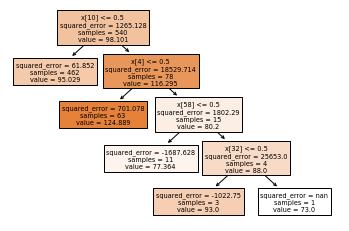

In [184]:
# Build a decision tree by regressing avg_salary on Sector, Rating, and the 
# (Sector, Rating) pairs. 

model = tree.DecisionTreeRegressor(max_depth=10) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)

# Compute performance:
perf_cart = performance(y_test,y_hat_cart)
print(perf_cart)


In [185]:
# What are the  𝑅2  and RMSE of your models on the test set?
from sklearn.metrics import mean_squared_error, r2_score


# Compute performance for the decision tree
perf_cart = {'R^2': r2_score(y_test, y_hat_cart), 'RMSE': np.sqrt(mean_squared_error(y_test, y_hat_cart))}
print("Decision Tree Performance:")
print(perf_cart)

# this code is from chatgpt

Decision Tree Performance:
{'R^2': 0.0028145202774648714, 'RMSE': 29.93040840600991}


In [186]:
# How do your answers compare to parts 2, 3, and 4?

# This R^2 is not as good at the original sets. The RMSE is also larger. The R^2 is smaller than 2-4 and the
# RMSE is larger than numbers 2 -4. 

## Part 7

In [187]:
cdf.head()

,Unnamed: 0,Rating,Size,Sector,avg_salary,job_state,Rating_Category
0,1,3.8,501 to 1000 employees,Aerospace & Defense,72.0,NM,good
1,2,3.4,10000+ employees,Health Care,87.5,MD,fair
3,4,3.8,1001 to 5000 employees,"Oil, Gas, Energy & Utilities",76.5,WA,good
4,5,2.9,51 to 200 employees,Business Services,114.5,NY,poor
5,6,3.4,201 to 500 employees,Real Estate,95.0,TX,fair


In [188]:
# Build a decision tree by regressing avg_salary on all the other variables. 

from sklearn import tree

# sector/rating pair: regressors
# rating: rdf
# sector: ssdf

# ssdf.shape

mdf = cdf['Rating']

tree_df = pd.concat([sdf,ssdf,jdf,rdf,mdf],axis=1)

treedf = tree_df.iloc[:-51]

# print(treedf.shape)

# Process data:
y = cdf['avg_salary']


X_train, X_test, y_train, y_test = train_test_split(treedf, y, test_size=0.2, random_state=42)



<ipython-input-182-cf45d1c1c5bf>:15: RuntimeWarning: invalid value encountered in scalar divide
  mcc = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))


{'confusion_matrix': col_0       31.5   39.5   40.5   48.5   49.0   50.0   51.0   53.5   54.0   \
row_0                                                                       
81.500000       0      0      0      0      0      0      0      0      0   
93.341686       1      1      1      0      2      1      0      1      2   
109.318182      0      0      0      1      0      0      1      0      0   
117.119048      0      0      0      0      0      0      0      0      0   
136.807692      0      0      0      0      0      0      0      0      0   
139.700000      0      0      0      0      0      0      0      0      0   
162.750000      0      0      0      0      0      0      0      0      0   

col_0       55.0   ...  139.5  140.0  150.5  151.5  153.0  163.0  164.0  \
row_0              ...                                                    
81.500000       0  ...      0      0      0      0      0      0      0   
93.341686       1  ...      2      2      0      0      0   

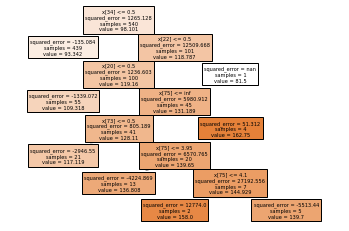

In [189]:
model = tree.DecisionTreeRegressor(max_depth=10) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)

# Compute performance:
perf_cart = performance(y_test,y_hat_cart)
print(perf_cart)


In [190]:
# What is the  𝑅2  and RMSE on the test set?

# Compute performance for the decision tree
perf_cart = {'R^2': r2_score(y_test, y_hat_cart), 'RMSE': np.sqrt(mean_squared_error(y_test, y_hat_cart))}
print("Decision Tree Performance:")
print(perf_cart)

# this code is from chatgpt

Decision Tree Performance:
{'R^2': 0.13965796499243022, 'RMSE': 27.80098869268749}


## Part 8

In [191]:
# Build a linear regression or decision tree using the available variables based on your own judgment. 


tree_df = pd.concat([sdf,ssdf,jdf,rdf],axis=1)

print(treedf.shape)

# Process data:
y = cdf['avg_salary']


X_train, X_test, y_train, y_test = train_test_split(treedf, y, test_size=0.2, random_state=42)



(676, 76)


<ipython-input-182-cf45d1c1c5bf>:15: RuntimeWarning: invalid value encountered in scalar divide
  mcc = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))


{'confusion_matrix': col_0       31.5   39.5   40.5   48.5   49.0   50.0   51.0   53.5   54.0   \
row_0                                                                       
24.833333       0      0      0      0      0      0      0      0      0   
69.940000       1      0      0      0      0      1      0      0      0   
100.969124      0      1      1      1      2      0      1      1      2   

col_0       55.0   ...  139.5  140.0  150.5  151.5  153.0  163.0  164.0  \
row_0              ...                                                    
24.833333       0  ...      0      0      0      0      0      0      0   
69.940000       0  ...      0      0      0      0      0      0      0   
100.969124      1  ...      2      2      2      1      1      1      2   

col_0       169.0  171.5  174.0  
row_0                            
24.833333       0      0      0  
69.940000       0      0      0  
100.969124      1      1      1  

[3 rows x 101 columns], 'accuracy': 0.0, 'spec

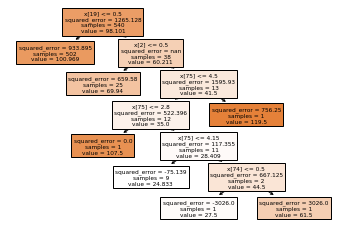

In [192]:
model = tree.DecisionTreeRegressor(max_depth=10) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)

# Compute performance:
perf_cart = performance(y_test,y_hat_cart)
print(perf_cart)


In [48]:
# What degrees of freedom are you giving the model to predict variation in wages across company and location attributes?

# I just did the tree to a depth of 10 because that's what performed the best in the question 1 set. 

In [193]:
# What is the  𝑅2  and RMSE of your model?

# Compute performance for the decision tree
perf_cart = {'R^2': r2_score(y_test, y_hat_cart), 'RMSE': np.sqrt(mean_squared_error(y_test, y_hat_cart))}
print("Decision Tree Performance:")
print(perf_cart)

Decision Tree Performance:
{'R^2': -0.10531904458474273, 'RMSE': 31.511457885851232}


In [50]:
# How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

# I thought my R^2 would be better because I just used the categorical variable for ranking instead of a numerical 
# variable, but it seems to be performing worse than all the other models I've created. I think it might perform
# worse than previous models because having both the numeric and categorical ranking provides a regressor to base results
# off of whereas just having a categorical variable for the rankings seems to confuse things and add more error. 
# Moreover, my model might have performed worse on the test set because 